In [482]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns

In [483]:
RED = '#6F1D1B'
RICH_BLACK = '#011627'

In [484]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.grid" : True,
    "grid.color" : "#8D99AE",
    # "font.size": 20,
})

In [485]:
def decorate_lag_plot(ax, xname, yname, loc):
    SIZE_TICKS = 12

    # x and y axis labels
    ax.set_xlabel(xname, fontsize=20)
    ax.set_ylabel(yname, fontsize=20)

    # Adjust tick labels size
    ax.tick_params(axis='both', which='major', labelsize=SIZE_TICKS)

    if loc:
        ax.legend(fontsize=10, loc=loc)

    plt.grid(True, linestyle='--', linewidth=0.05)
    plt.tight_layout()

In [486]:
def lag_plot(df, value_name, l=1, save=''):
    lag_df = pd.DataFrame(df[value_name])
    lag_df['lag'] = df[value_name].shift(l)

    lag_df.dropna(inplace=True)

    _, ax = plt.subplots(figsize=(7, 6))

    decorate_lag_plot(ax, r'$y_t$', f'$y_{{t + {l}}}$', '')

    sns.scatterplot(data=lag_df, 
                    x=value_name,
                    y="lag", 
                    color=RICH_BLACK, 
                    size=100, 
                    legend=False, 
                    ax=ax)

    if save:
        plt.savefig(f'../images/{save}.png', dpi=300, transparent=True)

    plt.show()

<h2> <center> Gold Price </center> </h2>

In [487]:
gold_df = pd.read_csv('../data/gold_prices_quarterly.csv')
gold_df

,Date,USD,EUR,JPY,GBP,CAD,CHF,INR,CNY,TRY,SAR,IDR,AED,THB,VND,EGP,KRW,RUB,ZAR,AUD
0,12/29/1978,214.1,132.1,NaN,107.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/30/1979,238.1,146.6,"47,981.2",118.1,282.0,398.5,"1,944.0",NaN,NaN,794.7,"148,515.9",910.7,"4,800.9",NaN,NaN,"115,233.4",NaN,203.5,210.2
2,6/29/1979,259.3,161.3,"56,555.9",124.5,300.6,444.5,"2,114.6",NaN,NaN,878.4,"161,455.6",991.7,"5,226.6",NaN,NaN,"124,572.2",NaN,219.2,233.9
3,9/28/1979,315.7,190.2,"69,090.6",141.6,368.0,517.0,"2,517.7",NaN,NaN,"1,061.0","197,436.4","1,195.6","6,420.3",NaN,NaN,"153,057.5",NaN,264.1,279.9
4,12/31/1979,408.4,243.8,"98,086.0",189.5,483.4,668.8,"3,347.6",NaN,NaN,"1,384.4","257,354.3","1,555.9","8,345.5",NaN,NaN,"199,028.3",NaN,340.6,372.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,6/30/2022,"1,870.6","1,758.1","242,875.3","1,491.3","2,389.4","1,806.3","144,445.6","12,373.6","29,516.9","7,017.2","27,256,748.6","6,870.7","64,372.4","43,164,258.4","34,671.0","2,361,500.2","125,560.1","29,210.8","2,623.1"
175,9/30/2022,"1,728.9","1,717.2","238,933.9","1,469.6","2,257.1","1,671.2","137,916.6","11,836.3","30,994.5","6,495.7","25,814,666.9","6,350.3","62,921.4","40,566,422.8","33,100.8","2,317,227.7","104,327.3","29,442.6","2,531.4"
176,12/30/2022,"1,725.9","1,693.6","244,438.3","1,471.6","2,342.5","1,664.8","141,718.8","12,285.1","32,124.8","6,487.5","26,846,159.6","6,338.9","62,796.6","42,014,855.4","39,864.7","2,350,658.0","108,431.2","30,429.0","2,629.2"
177,3/31/2023,"1,889.9","1,761.0","250,143.8","1,554.6","2,555.8","1,748.6","155,342.7","12,929.6","35,693.9","7,095.3","28,763,364.6","6,941.4","64,113.6","44,531,622.8","56,929.3","2,412,139.9","138,770.6","33,585.3","2,765.8"


In [488]:
gold_df['USD'] = gold_df['USD'].str.replace(',', '').astype(float)

gold_df['Date'] = pd.to_datetime(gold_df['Date'], format='%m/%d/%Y')

gold_df.sort_values('Date', inplace=True)

gold_df

,Date,USD,EUR,JPY,GBP,CAD,CHF,INR,CNY,TRY,SAR,IDR,AED,THB,VND,EGP,KRW,RUB,ZAR,AUD
0,1978-12-29,214.1,132.1,NaN,107.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1979-03-30,238.1,146.6,"47,981.2",118.1,282.0,398.5,"1,944.0",NaN,NaN,794.7,"148,515.9",910.7,"4,800.9",NaN,NaN,"115,233.4",NaN,203.5,210.2
2,1979-06-29,259.3,161.3,"56,555.9",124.5,300.6,444.5,"2,114.6",NaN,NaN,878.4,"161,455.6",991.7,"5,226.6",NaN,NaN,"124,572.2",NaN,219.2,233.9
3,1979-09-28,315.7,190.2,"69,090.6",141.6,368.0,517.0,"2,517.7",NaN,NaN,"1,061.0","197,436.4","1,195.6","6,420.3",NaN,NaN,"153,057.5",NaN,264.1,279.9
4,1979-12-31,408.4,243.8,"98,086.0",189.5,483.4,668.8,"3,347.6",NaN,NaN,"1,384.4","257,354.3","1,555.9","8,345.5",NaN,NaN,"199,028.3",NaN,340.6,372.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,2022-06-30,1870.6,"1,758.1","242,875.3","1,491.3","2,389.4","1,806.3","144,445.6","12,373.6","29,516.9","7,017.2","27,256,748.6","6,870.7","64,372.4","43,164,258.4","34,671.0","2,361,500.2","125,560.1","29,210.8","2,623.1"
175,2022-09-30,1728.9,"1,717.2","238,933.9","1,469.6","2,257.1","1,671.2","137,916.6","11,836.3","30,994.5","6,495.7","25,814,666.9","6,350.3","62,921.4","40,566,422.8","33,100.8","2,317,227.7","104,327.3","29,442.6","2,531.4"
176,2022-12-30,1725.9,"1,693.6","244,438.3","1,471.6","2,342.5","1,664.8","141,718.8","12,285.1","32,124.8","6,487.5","26,846,159.6","6,338.9","62,796.6","42,014,855.4","39,864.7","2,350,658.0","108,431.2","30,429.0","2,629.2"
177,2023-03-31,1889.9,"1,761.0","250,143.8","1,554.6","2,555.8","1,748.6","155,342.7","12,929.6","35,693.9","7,095.3","28,763,364.6","6,941.4","64,113.6","44,531,622.8","56,929.3","2,412,139.9","138,770.6","33,585.3","2,765.8"


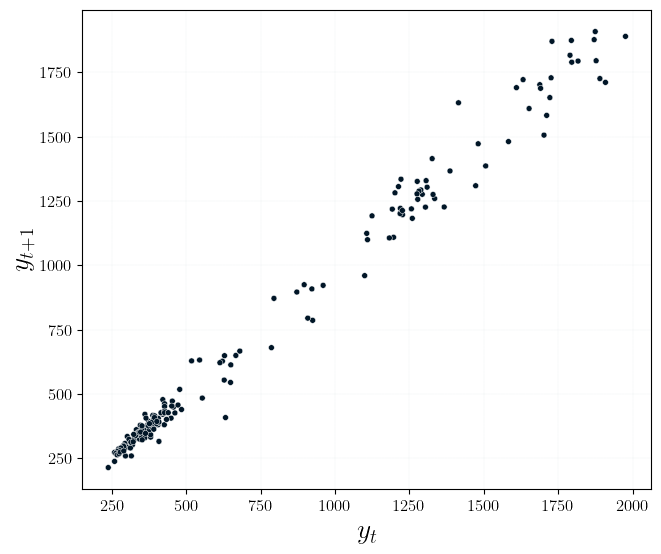

In [489]:
lag_plot(gold_df, 'USD', 1)

<h2> <center> Wine Australia </center> </h2>

In [ ]:
wine_df = pd.read_csv('../data/AusWineSales.csv')
wine_df

,YearMonth,Red,Sparkling,Sweetwhite
0,1980-01,464,1686,85
1,1980-02,675,1591,89
2,1980-03,703,2304,109
3,1980-04,887,1712,95
4,1980-05,1139,1471,91
...,...,...,...,...
182,1995-03,2459,1897,188
183,1995-04,2618,1862,195
184,1995-05,2585,1670,189
185,1995-06,3310,1688,220


In [491]:
wine_df = wine_df[['YearMonth', 'Red']].copy()
wine_df['YearMonth'] = pd.to_datetime(wine_df['YearMonth'], format='%Y-%m')

wine_df.sort_values('YearMonth', inplace=True)
wine_df

,YearMonth,Red
0,1980-01-01,464
1,1980-02-01,675
2,1980-03-01,703
3,1980-04-01,887
4,1980-05-01,1139
...,...,...
182,1995-03-01,2459
183,1995-04-01,2618
184,1995-05-01,2585
185,1995-06-01,3310


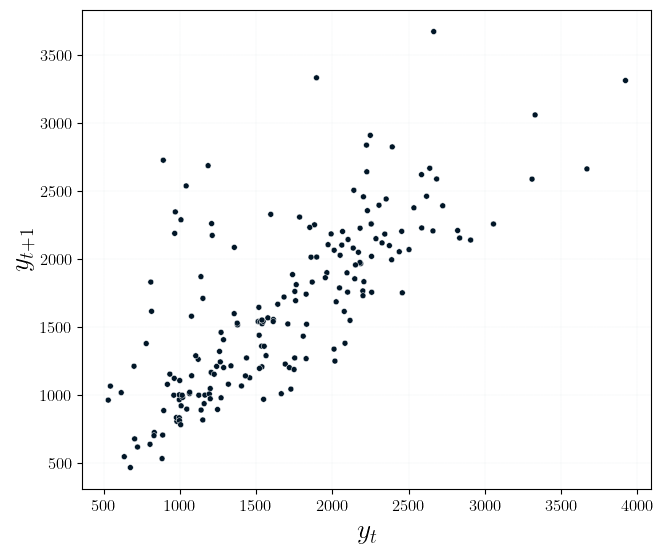

In [492]:
# lag_plot(wine_df, 'Red', 1, 'australia_wine_lag_plot')
lag_plot(wine_df, 'Red', 1)

<h2> <center> Random </center> </h2>

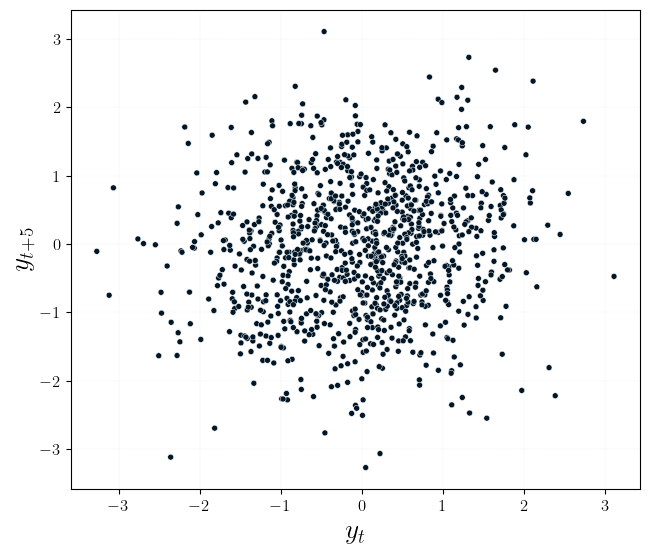

In [ ]:
sample_size=1000
random_series = pd.DataFrame(np.random.normal(size=sample_size)) 
# lag_plot(random_series, 0, l=1, save='random_series_lag_plot')
lag_plot(random_series, 0, l=1)